In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [5]:
gfdl_6x_rldscs = xr.open_dataset('/disco/share/mh920/data_eocene/GFDL_CM2.1-deepmip_stand_6xCO2-rldscs-v1.0.mean.nc')
gfdl_6x_rlds = xr.open_dataset('/disco/share/mh920/data_eocene/GFDL_CM2.1-deepmip_stand_6xCO2-rlds-v1.0.mean.nc')
gfdl_6x_rlus = xr.open_dataset('/disco/share/mh920/data_eocene/GFDL_CM2.1-deepmip_stand_6xCO2-rlus-v1.0.mean.nc')
gfdl_6x_rlutcs = xr.open_dataset('/disco/share/mh920/data_eocene/GFDL_CM2.1-deepmip_stand_6xCO2-rlutcs-v1.0.mean.nc')
gfdl_6x_rlut = xr.open_dataset('/disco/share/mh920/data_eocene/GFDL_CM2.1-deepmip_stand_6xCO2-rlut-v1.0.mean.nc')
gfdl_6x_rsdscs = xr.open_dataset('/disco/share/mh920/data_eocene/GFDL_CM2.1-deepmip_stand_6xCO2-rsdscs-v1.0.mean.nc')
gfdl_6x_rsds = xr.open_dataset('/disco/share/mh920/data_eocene/GFDL_CM2.1-deepmip_stand_6xCO2-rsds-v1.0.mean.nc')
gfdl_6x_rsdt = xr.open_dataset('/disco/share/mh920/data_eocene/GFDL_CM2.1-deepmip_stand_6xCO2-rsdt-v1.0.mean.nc')
gfdl_6x_rsuscs = xr.open_dataset('/disco/share/mh920/data_eocene/GFDL_CM2.1-deepmip_stand_6xCO2-rsuscs-v1.0.mean.nc')
gfdl_6x_rsus = xr.open_dataset('/disco/share/mh920/data_eocene/GFDL_CM2.1-deepmip_stand_6xCO2-rsus-v1.0.mean.nc')
gfdl_6x_rsutcs = xr.open_dataset('/disco/share/mh920/data_eocene/GFDL_CM2.1-deepmip_stand_6xCO2-rsutcs-v1.0.mean.nc')
gfdl_6x_rsut = xr.open_dataset('/disco/share/mh920/data_eocene/GFDL_CM2.1-deepmip_stand_6xCO2-rsut-v1.0.mean.nc')
gfdl_sftlf = xr.open_dataset('/disco/share/mh920/data_eocene/GFDL_CM2.1-deepmip_sens_1xCO2-sftlf-v1.0.nc')

In [7]:
albedo = (gfdl_6x_rsus.rsus/gfdl_6x_rsds.rsds).mean('time')

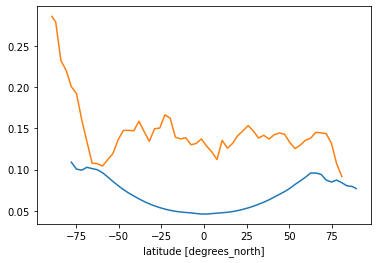

In [11]:
albedo.where(gfdl_sftlf.sftlf.values==0).mean('lon').plot()
albedo.where(gfdl_sftlf.sftlf.values>0).mean('lon').plot()

Text(0, 0.5, 'Latitude')

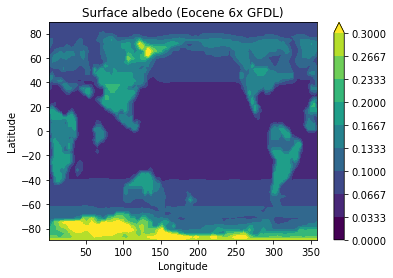

In [4]:
(gfdl_6x_rsus.rsus/gfdl_6x_rsds.rsds).mean('time').plot.contourf(levels=np.linspace(0,0.3,10))
plt.title('Surface albedo (Eocene 6x GFDL)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [2]:
sftlf = xr.open_dataset('/disco/share/mh920/data_eocene/CESM1.2_CAM5-deepmip_sens_1xCO2-sftlf-v1.0.mean.nc')
orog = xr.open_dataset('/disco/share/mh920/data_eocene/CESM1.2_CAM5-orography.nc')

Text(0.5, 1.0, 'Eocene continental configuration')

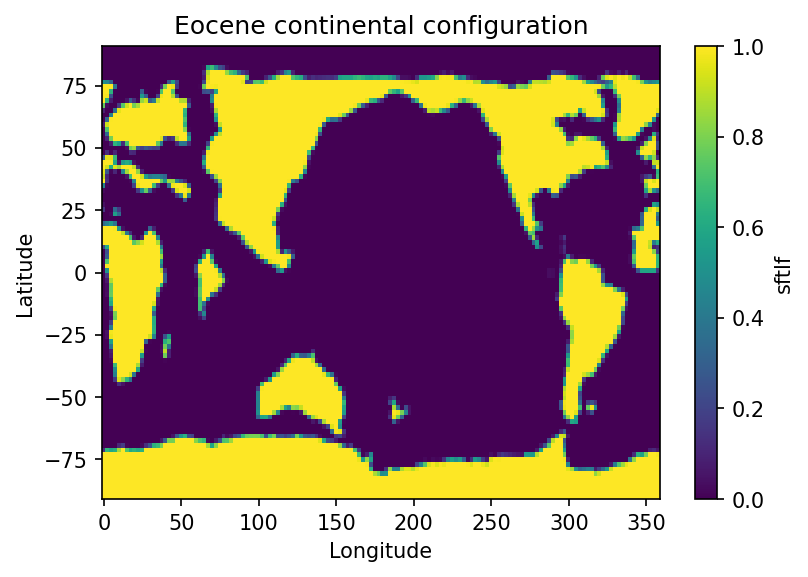

In [10]:
plt.figure(figsize=(6,4),dpi=150)
sftlf.sftlf.mean('month').plot()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Eocene continental configuration')

In [6]:
orog.lat.shape

(96,)

In [7]:
orog.lon.shape

(144,)

In [8]:
orog.orog.mean('month').shape

(96, 144)

In [9]:
from scipy import interpolate
lati, longi = np.meshgrid(orog.lat,orog.lon)
f = interpolate.interp2d(orog.lon,orog.lat,orog.orog.mean('month'),kind='cubic')

In [14]:
era42 = xr.open_dataset('./../../Isca/input/land_masks/era_land_t42.nc')

In [16]:
eocene_land_T42 = era42.assign(zsurf = orog.orog.mean('month').interp(lat=era42.lat,lon=era42.lon,method='linear'))
eocene_land_T42 = eocene_land_T42.assign(land_mask = sftlf.sftlf.mean('month').interp(lat=era42.lat,lon=era42.lon,method='linear'))

In [22]:
eocene_land_T42.to_netcdf('eocene_land_T42.nc')